# How to Add Your Jupyter Notebook Example

Please ensure that your notebook is well-formatted for documentation and reproducible by others.

## Finalizing your notebook

Follow these steps to keep your notebook clean, structured, and functional:

1. Ensure you are using relative file paths.

- Example: `ds_nazare = xr.open_dataset('/data/s2_nazare.nc')`
- Avoid something like `ds_nazare = xr.open_dataset('C:/Users/your_name/ray_tracing/notebooks/your_folder/data/s2_nazare.nc')`

2. Include required data.

- If your example requires generated data, include the code that creates it.
- Include actual data files in a `data/` folder within your example directory.
- Do not include synthetic data files.

3. Refactor helper functions.

- Move non-essential functions to a `support.py` file in your subfolder.
- Keep function definitions in the notebook if their implementation is meaningful to the example.

4. Remove unnecessary code and output.

- Remove print statements used for debugging unless they add value.
- Delete commented-out code unless it serves as a meaningful explanation.
- Delete any unused cells.

5. Present output in a clear and readable format.

- Use tables, formatted strings, or labeled figures.
- Output should be clear and understandable to the reader.

6. Ensure clear markdown organization.

- Use headers for organization (# Title, ## Section, ### Subsection).
- Include a sentence or two explanation after each header.
- Verify that markdown renders correctly, especially for math formatting.

> Important note: use the `#` header only once for the title of your file. If you include it multiple times, the documentation will not render properly.

7. Ensure code executes properly.

- (Re)Run `pixi run -e docs develop`
- Restart the kernel and run all cells.
- Ensure all cells execute successfully in the `docs` environment.

8. Proper style.

- Use Ruff for formatting and linting:
```
pixi run ruff format path/to/file
pixi run ruff check path/to/file
```
- Use meaningful variable names.
- Write clear but non-redundant comments.
- Include docstrings for functions ("""Description""").
- Check spelling and grammar in markdown, comments, and code.

## Adding your example to the documentation

Now that your notebook is polished, follow these steps to include it in the notebooks gallery:

9. Save your notebook in the right location.

- Create a subfolder inside the `notebooks/` directory to contain your example.
- Example: this file is located at `notebooks/tutorial/tutorial.ipynb`.

10. Add notebook to the gallery.

- Append your notebook filename (without `.ipynb`) to `docs/gallery_header.rst`.
- Example: this notebook is `tutorial.ipynb`, so `tutorial` is appended to `docs/gallery_header.rst`.

> Important note: If a name conflict exists, rename your notebook.

11. Make sure the docs build with no error.

- Run:
```
SPHINXOPTS="-W --keep-going -n" pixi run -e docs python-docs
```
- Ensure there are no errors.
- Open `docs/_build/html/index.html` in a browser and confirm your notebook appears in the gallery.

12. Submit your notebook.

- If everything works, open a Pull Request (PR) to add your example! 🎉

13. Getting help.

- If you have any questions or following these instructions does not work, please ask!

## Example Notebook

Below is an example notebook. This section of the notebook was adapted from the shear current example, formatted using the steps above.

In [ ]:
# include imports first, in one cell
from mantaray.core import single_ray
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Create and display bathymetry dataset based on a step function.

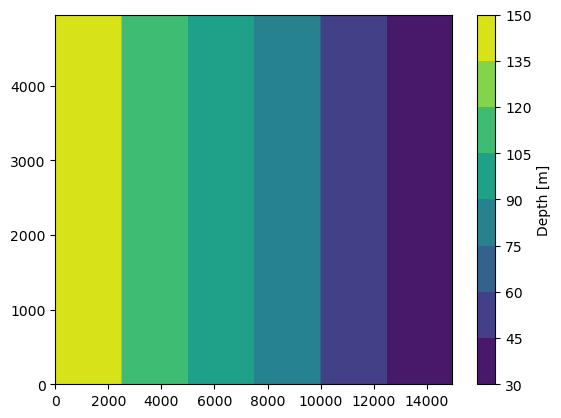

In [ ]:
# Create Bathymetry
NX = 300
NY = 100
dl = 50
xs = np.arange(0, NX) * dl
ys = np.arange(0, NY) * dl
xss, yss = np.meshgrid(xs, ys)
coords = xss * yss
depth_max = 140
d_depth = 20
n_shelfs = 6
depth = depth_max - np.floor(np.linspace(0, n_shelfs, NX, endpoint=False)) * d_depth
bathymetry = depth * np.ones((len(ys), len(xs)))
fig, ax = plt.subplots()
depth = ax.contourf(xss, yss, bathymetry)
cbar = fig.colorbar(depth)
cbar.ax.set_ylabel("Depth [m]")
plt.show()

Save bathymetry data as netcdf3 file.

In [ ]:
bathymetry_array = xr.Dataset(
    data_vars={"depth": (("y", "x"), bathymetry)},
    coords={"x": ("x", np.float64(xs)), "y": ("y", np.float64(ys))},
)
bathymetry_array.to_netcdf(path="bathymetry.nc", format="NETCDF3_CLASSIC")

Create null current and save it as netcdf3 file.

In [ ]:
null_current = xr.Dataset(
    data_vars={
        "u": (("x", "y"), np.zeros_like(coords).T),
        "v": (("x", "y"), np.zeros_like(coords).T),
    },
    coords={"y": ys, "x": xs},
)
null_current.to_netcdf(path="null_current.nc", format="NETCDF3_CLASSIC")

Define the initial ray tracing parameters for this example.

In [ ]:
# Define wave number
k = 2 * np.pi / 20000  # lambda = 100m
phi0 = 20 * np.pi / 180  # phi0 = 25 degrees from x axis
kx = k * np.cos(phi0)
ky = k * np.sin(phi0)
omega = np.sqrt(depth_max * 9.81) * k

# Define ray initial positon
x0 = 50  # Offset from 0 by 1 step
y0 = 500

Run `single_ray` to simulate your initial ray.

In [ ]:
ray_evolution_raw = single_ray(
    x0, y0, kx, ky, 1000, 0.5, bathymetry="bathymetry.nc", current="null_current.nc"
)

and so on for the rest of your notebook ...